# Artificial Neural Network

#### Build ANN model on concrete compressive strength dataset. Predict the compressive strength based on attributes.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
concrete_df = pd.read_csv(r"D:\360digi\DS\Sharath\Neural_Network_Master_Class\handson\Datasets_ANN Assignment\concrete.csv")
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
# check missing value
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
concrete_df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


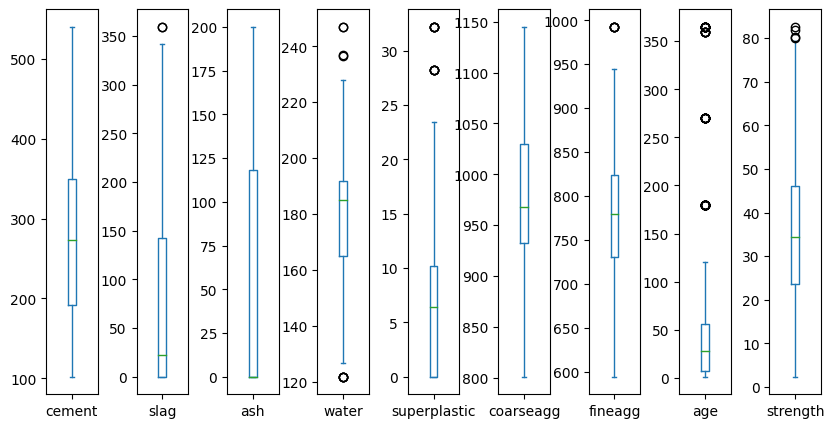

In [8]:
# box plot visualisation
concrete_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (10,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
# outliers are in stag, water, superplastic, fineagg, age, strength columns

In [9]:
# Seperating input and output variables 
X = pd.DataFrame(concrete_df.iloc[:, 0:8])
Y = pd.DataFrame(concrete_df.iloc[:, 8])

In [10]:
Y

,strength
0,29.89
1,23.51
2,29.22
3,45.85
4,18.29
...,...
1025,13.29
1026,41.30
1027,44.28
1028,55.06


## Data Preprocessing

In [11]:
# Select numeric features for data preprocessing
numeric_features = X.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')


In [12]:
categorical_features = X.select_dtypes(include = ['object']).columns
print(categorical_features)

Index([], dtype='object')


In [13]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = list(numeric_features))
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['cement', 'slag', 'ash', 'water', 'superplastic',
                      'coarseagg', 'fineagg', 'age'])

In [14]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['cement', 'slag', 'ash', 'water',
                                       'superplastic', 'coarseagg', 'fineagg',
                                       'age']))])

In [15]:
preprocessor = ColumnTransformer(transformers = [('wins', outlier_pipeline, numeric_features)])
print(preprocessor)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['cement',
                                                                        'slag',
                                                                        'ash',
                                                                        'water',
                                                                        'superplastic',
                                                                        'coarseagg',
                                                                        'fineagg',
                                                                        'age']))]),
         

In [16]:
clean = preprocessor.fit(X)
clean

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['cement',
                                                                        'slag',
                                                                        'ash',
                                                                        'water',
                                                                        'superplastic',
                                                                        'coarseagg',
                                                                        'fineagg',
                                                                        'age']))]),
                                 Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object'))])

In [17]:
cleandata = pd.DataFrame(clean.transform(X), columns = numeric_features)
cleandata.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0


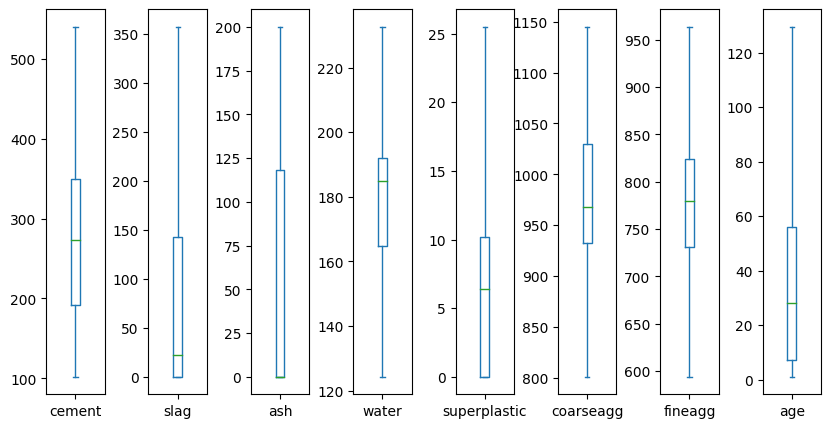

In [18]:
# box plot visualisation
cleandata.plot(kind = 'box', subplots = True, sharey = False, figsize = (10,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [19]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(cleandata)

In [20]:
scaled_data = pd.DataFrame(scale.transform(cleandata), columns = numeric_features)
scaled_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.409059,0.206763,0.270806,0.528536,0.241531,0.499764,0.485530,0.288486
std,0.238599,0.241389,0.319825,0.195803,0.227547,0.226029,0.215965,0.278461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206336,0.000000,0.000000,0.375000,0.000000,0.380814,0.370561,0.046693
50%,0.390183,0.061560,0.000000,0.560424,0.250980,0.485465,0.501928,0.210117
75%,0.566210,0.400000,0.591204,0.625000,0.400000,0.663953,0.622336,0.428016
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# scaling the target variable.
num_features = ['strength']
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, num_features)]) # Skips the transformations for remaining columns

scale1 = scale_columntransfer.fit(Y)

In [22]:
scaled_Y = pd.DataFrame(scale1.transform(Y), columns = num_features)
scaled_Y.describe()

,strength
count,1030.000000
mean,0.417191
std,0.208119
min,0.000000
25%,0.266351
50%,0.400087
75%,0.545721
max,1.000000


In [23]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, scaled_Y, test_size = 0.2, random_state = 0) 

In [24]:
X_train.shape

(824, 8)

In [25]:
X_test.shape

(206, 8)

In [26]:
Y_test.head()

,strength
747,0.212034
718,0.234583
175,0.189984
828,0.676218
713,0.639841


## Model Building

### Building a Multi layer Perceptron model for which we are giving the input to train the ANN.

In [27]:
# Initializing the model
model = Sequential()
model.add(Dense(10, input_dim = 8, activation = 'relu'))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = "mse", optimizer = "adam", metrics = [tf.keras.metrics.MeanAbsoluteError()])


In [28]:
# fiiting model on train data
model.fit(x = X_train, y = Y_train, batch_size = 100, epochs = 50, verbose = 1, validation_data = (X_test, Y_test))

Epoch 1/50
9/9 [==============================] - 1s 32ms/step - loss: 0.0590 - mean_absolute_error: 0.2037 - val_loss: 0.0547 - val_mean_absolute_error: 0.1980
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.1810 - val_loss: 0.0456 - val_mean_absolute_error: 0.1744
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0428 - mean_absolute_error: 0.1691 - val_loss: 0.0418 - val_mean_absolute_error: 0.1632
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.1654 - val_loss: 0.0404 - val_mean_absolute_error: 0.1581
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0405 - mean_absolute_error: 0.1631 - val_loss: 0.0395 - val_mean_absolute_error: 0.1559
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.1607 - val_loss: 0.0387 - val_mean_absolute_error: 0.1554
Epoch 7/50
9/9 [=======================

In [29]:
# Prediction on test data
results = pd.DataFrame(model.predict(X_test, verbose = 1))
results

7/7 [==============================] - 0s 2ms/step


,0
0,0.221817
1,0.246601
2,0.196062
3,0.527349
4,0.535495
...,...
201,0.467896
202,0.216492
203,0.279067
204,0.581830


In [30]:
# Evaluating the model on test data
eval_score_test = model.evaluate(X_test, Y_test, verbose = 1)
# Accuracy on test data set
print("Accuracy: %.3f%%" %((1-eval_score_test[1])*100))

7/7 [==============================] - 0s 2ms/step - loss: 0.0115 - mean_absolute_error: 0.0841
Accuracy: 91.588%


In [31]:
# Accuracy score on train data
eval_score_train = model.evaluate(X_train, Y_train, verbose = 0)
print("Accuracy: %.3f%%" %((1-eval_score_train[1])*100))

Accuracy: 92.203%
